# VlookUP in Pandas 🐼

## Imports & Path Settings

In [ ]:
import pandas as pd
from pathlib import Path

In [ ]:
DATA_DIR = Path.cwd() / 'data'
excel_file_path = DATA_DIR / 'data.xlsx'

## Read Excel Data

In [ ]:
orders = pd.read_excel(excel_file_path,
                       sheet_name = 'Orders')

returns = pd.read_excel(excel_file_path,
                        sheet_name = 'Returns')
 
shipping = pd.read_excel(excel_file_path,
                        sheet_name = 'Shipping')

#### Alternative Solution (create dataframe for each worksheet)

In [ ]:
excel_file = pd.ExcelFile(excel_file_path)
sheet_names = excel_file.sheet_names
sheet_names

In [ ]:
dataframes = {}
for sheet_name in sheet_names:
    dataframes[sheet_name] = pd.read_excel(excel_file,sheet_name = sheet_name)

# Example: Dict Comprehensions
# dataframes_compr = {sheet_name: pd.read_excel(excel_file,sheet_name = sheet_name) for sheet_name in sheet_names}

dataframes['Orders'].head(3)

### Check DataFrame

In [ ]:
orders.head()

In [ ]:
returns.head()

In [ ]:
shipping.head()

## VlookUp (pd.merge)

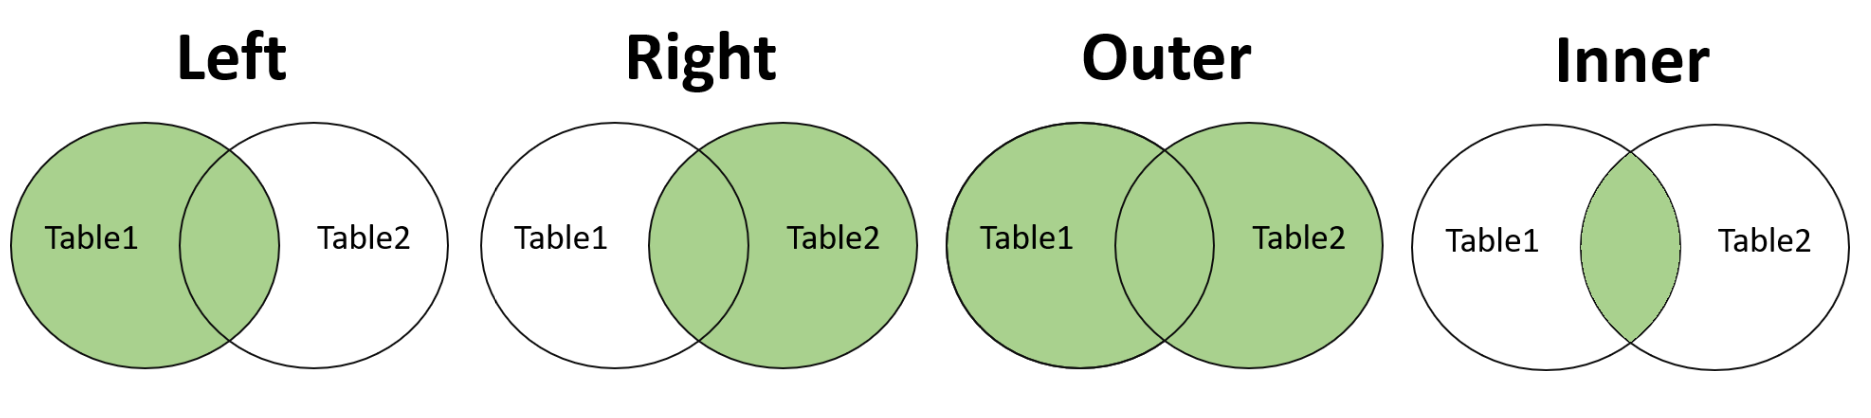

In [ ]:
df1 = orders.merge(returns,
                  left_on= 'Order ID',
                  right_on = 'ID',
                  how= 'left')
df1.head()

In [ ]:
df2 = df1.merge(shipping,
                left_on= 'Ship Mode',
                right_on= 'Ship Mode',
                how= 'left')
df2.head()

## Export to `new` Excel workbook

In [ ]:
excel_output_path = DATA_DIR / 'output.xlsx'
df2.to_excel(excel_output_path,
            sheet_name= 'Output',
            index=False)

## Export to `same` Excel workbook

In [ ]:
!pip install xlwings --quiet

In [ ]:
import xlwings as xw

In [ ]:
wb = xw.Book(excel_file_path) 

###  Add DataFrame to `new` worksheet

In [ ]:
new_sht = wb.sheets.add('Output')

In [ ]:
new_sht.range("A1").options(index=False).value = df2

###  Add DataFrame to `existing` worksheet

In [ ]:
sht = wb.sheets('Orders')

In [ ]:
columns = ['Returned','Reason', 'Ship Mode No.']

In [ ]:
sht.range("D1").options(index=False).value =  df2[columns]
sht.range("D1:F1").color = (253,233,217)